In [1]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. loading data
file_path = "DryBeanDataset/Dry_Bean_Dataset.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# 2. encoding categorical labels
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])

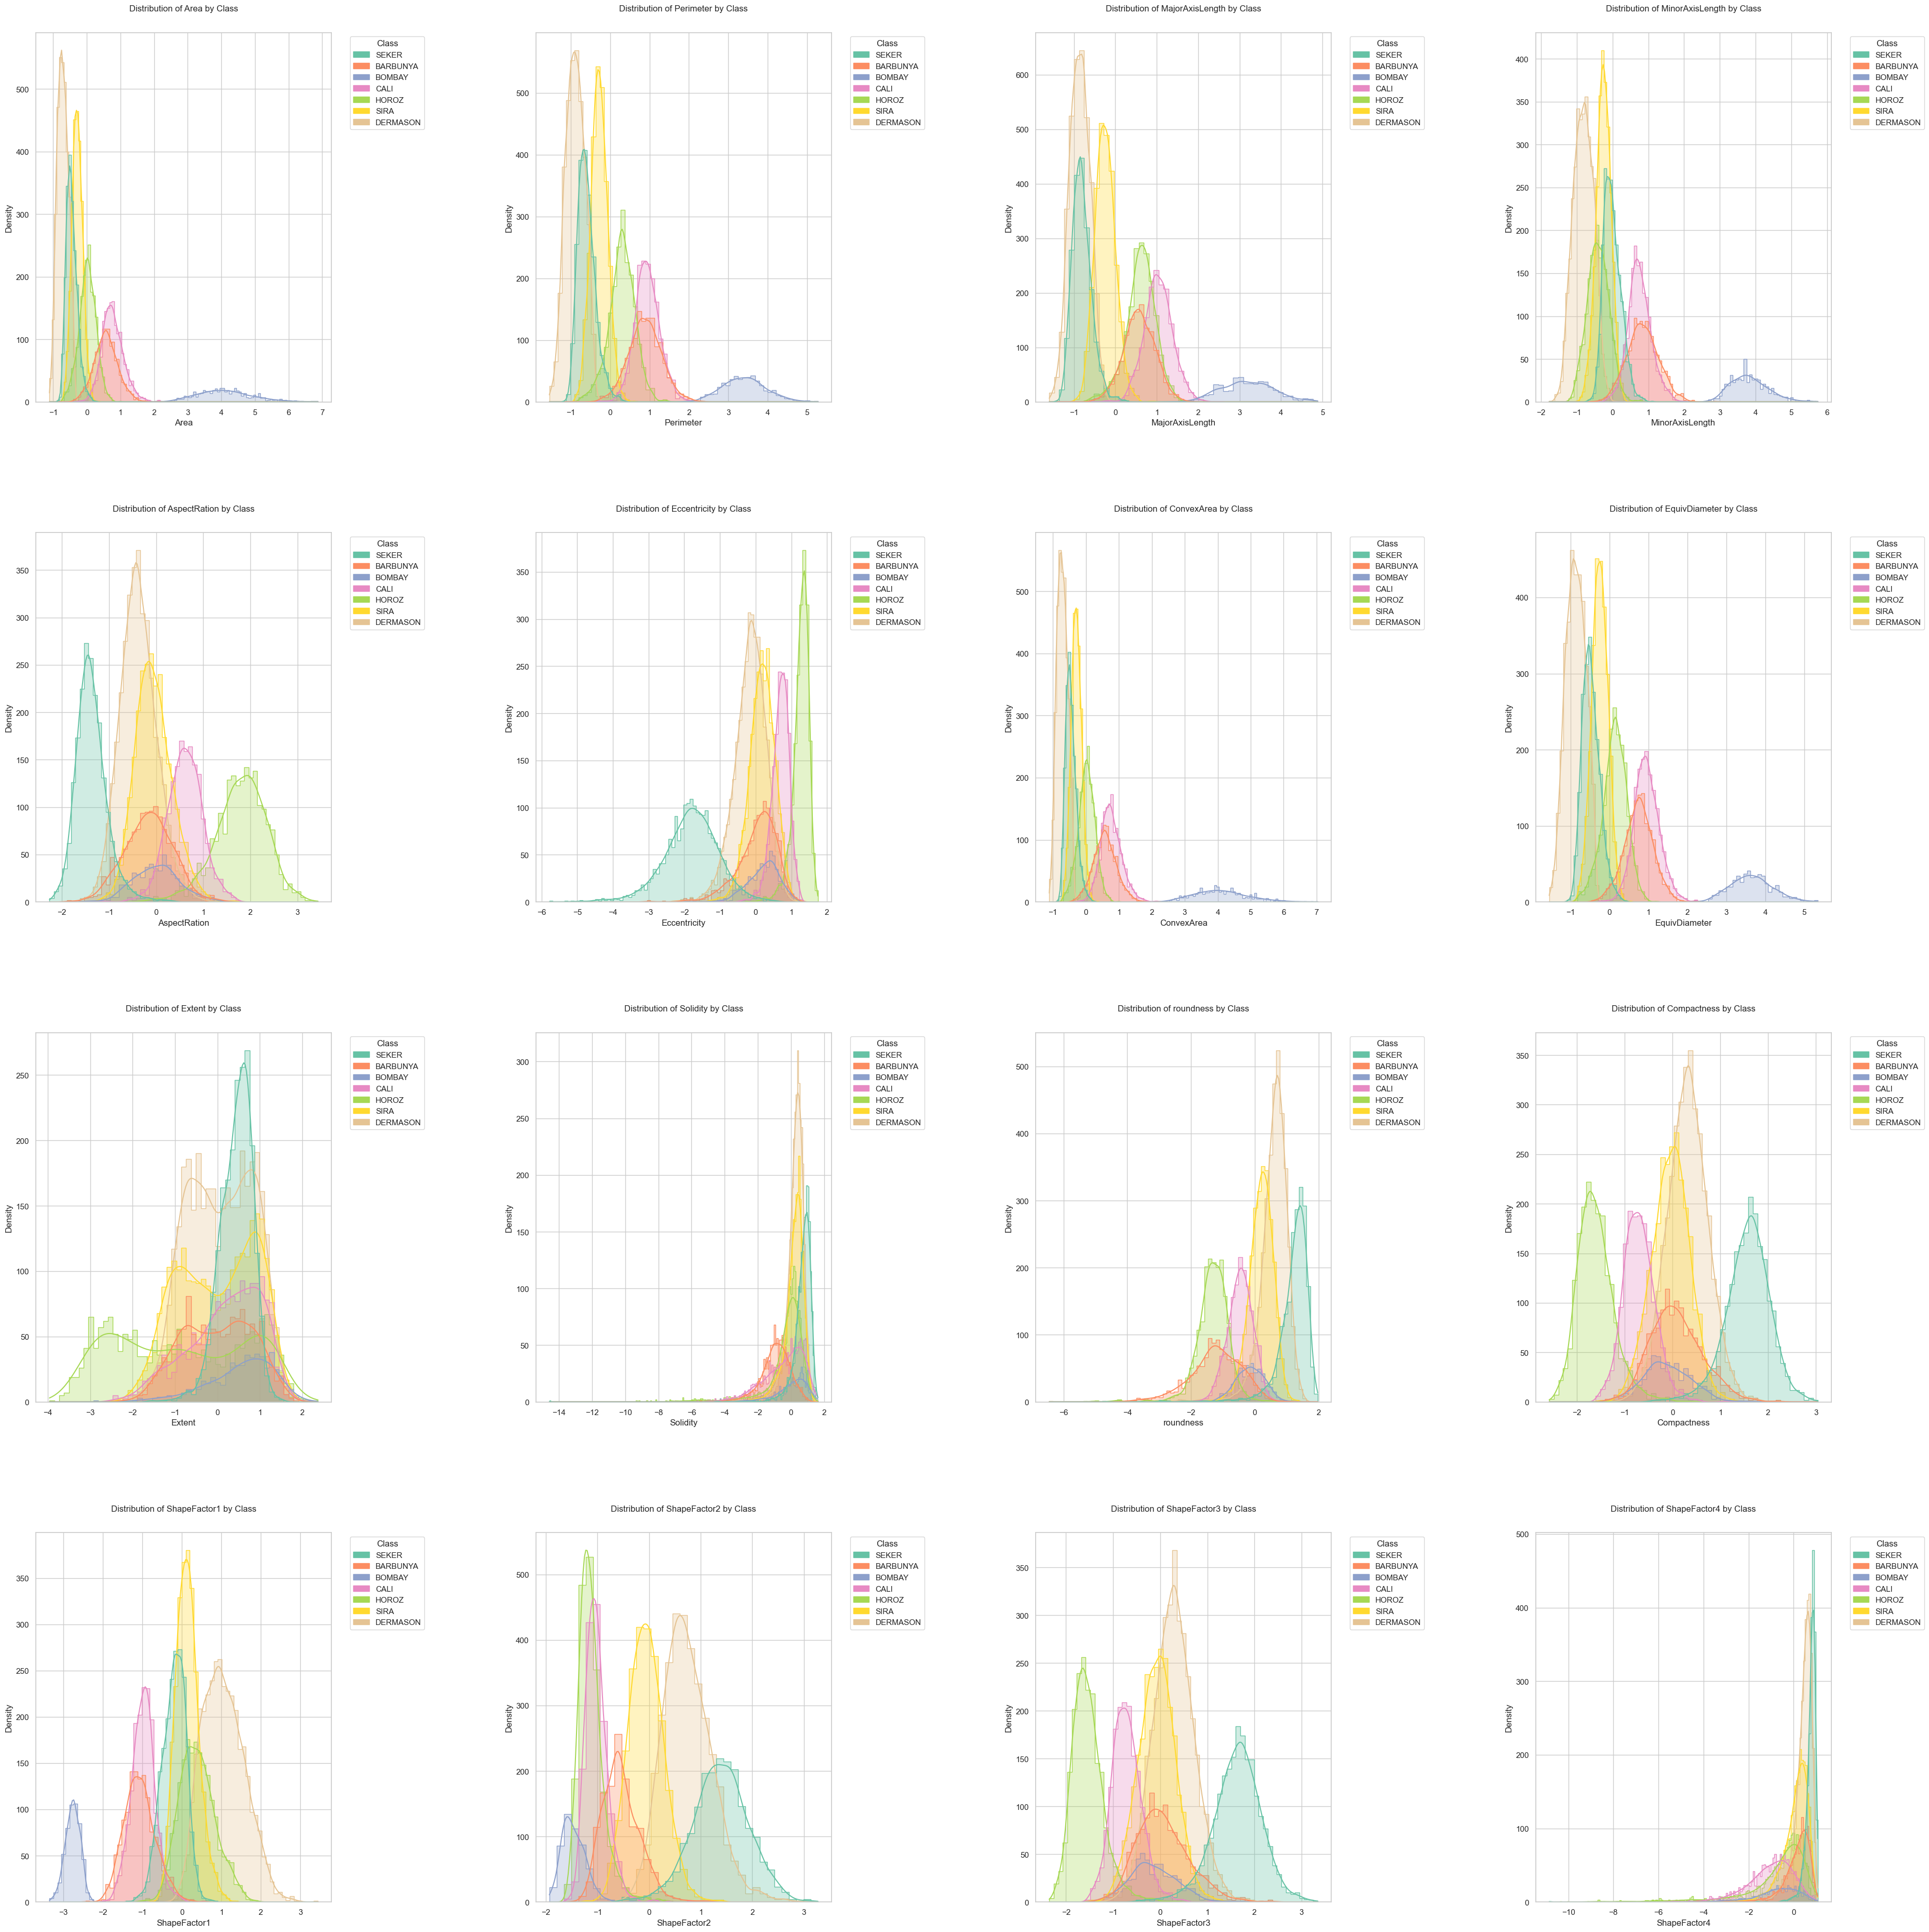

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd

# 设置可视化风格
sns.set_theme(style="whitegrid", palette="pastel")

# 获取特征列（排除类别相关列）
features = df.columns.drop(['Class', 'Class_encoded']).tolist()

# 计算行数和列数
num_features = len(features)
ncols = 4
nrows = math.ceil(num_features / ncols)

# 创建一个包含4列子图的网格
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40, 10 * nrows))  # 指定整体图片大小

# 调整字体大小
plt.rcParams['font.size'] = 100

# 遍历每个特征并绘制分布图
for i, feature in enumerate(features):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    
    # 使用分层直方图 + KDE曲线
    sns.histplot(
        data=df,
        x=feature,
        hue='Class',
        element="step",  # 清晰的阶梯状直方图
        kde=True,        # 增加核密度估计
        palette="Set2",  # 指定调色板
        alpha=0.3,       # 半透明效果
        ax=ax            # 指定绘制在当前子图
    )
    
    ax.set_title(f'Distribution of {feature} by Class', pad=30)
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    
    # 手动添加图例项
    import matplotlib.patches as mpatches

    # 获取所有类别
    classes = df['Class'].unique()

    # 创建图例项
    legend_patches = [mpatches.Patch(color=sns.color_palette("Set2")[i], label=cls) for i, cls in enumerate(classes)]

    # 添加图例
    ax.legend(handles=legend_patches, title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')

# 显示图片
plt.show()

In [4]:
class_col = df[['Class', 'Class_encoded']].copy()

features_to_scale = df.columns.drop(['Class', 'Class_encoded'])

scaler = StandardScaler()
scaled_features = pd.DataFrame(
    scaler.fit_transform(df[features_to_scale]),
    columns=features_to_scale
)

processed_df = pd.concat([scaled_features, class_col], axis=1)
processed_df = processed_df[df.columns]

processed_df.to_csv("data_processed.csv", index=False)

# 验证输出
print("标准化后的数据已保存为 data_processed.csv")
print("前 3 行数据示例：")
print(processed_df.head(3))

标准化后的数据已保存为 data_processed.csv
前 3 行数据示例：
       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.840749  -1.143319        -1.306598        -0.631153     -1.565053   
1 -0.829188  -1.013924        -1.395911        -0.434445     -1.969784   
2 -0.807157  -1.078829        -1.252357        -0.585735     -1.514291   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.185720   -0.841451      -1.063341  0.289087  0.367613   1.423867   
1     -3.686040   -0.826102      -1.044217  0.697477 -0.462907   0.231054   
2     -2.045336   -0.808704      -1.008084  0.578195  0.518417   1.252865   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  \
0     1.839116      0.680786      2.402173      1.925723      0.838371  SEKER   
1     2.495449      0.367967      3.100893      2.689702      0.771138  SEKER   
2     1.764843      0.603129      2.235091      1.841356      0.916755  SEKER   

   Class_encoded  
0       

PC1: 单独解释率 = 0.5547, 累积解释率 = 0.5547
PC2: 单独解释率 = 0.2643, 累积解释率 = 0.8190
PC3: 单独解释率 = 0.0801, 累积解释率 = 0.8990
PC4: 单独解释率 = 0.0511, 累积解释率 = 0.9502
PC5: 单独解释率 = 0.0274, 累积解释率 = 0.9776
PC6: 单独解释率 = 0.0115, 累积解释率 = 0.9891
PC7: 单独解释率 = 0.0070, 累积解释率 = 0.9960
PC8: 单独解释率 = 0.0033, 累积解释率 = 0.9993
PC9: 单独解释率 = 0.0005, 累积解释率 = 0.9998
PC10: 单独解释率 = 0.0001, 累积解释率 = 0.9999


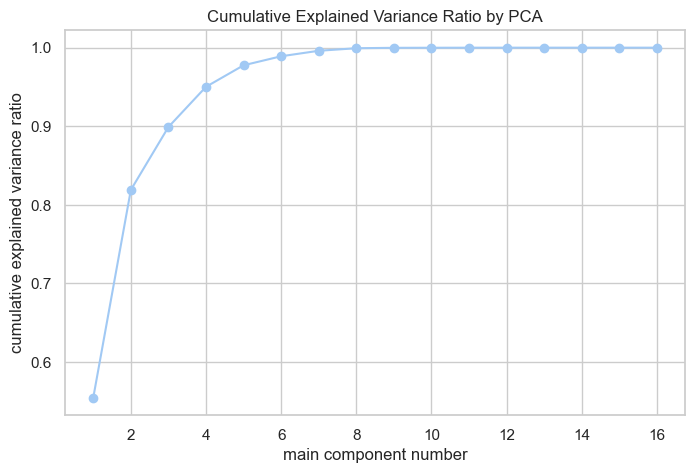

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. loading data
df = pd.read_csv('data_processed.csv')
X = df.drop(columns=['Class', 'Class_encoded'])

# 2. train PCA
pca = PCA(n_components=X.shape[1])
pca.fit(X)

# loadings = pd.DataFrame(
#     pca.components_.T,                # transpose the components
#     index=X.columns,                  # use original feature names
#     columns=[f'PC{i}' for i in range(1, X.shape[1]+1)]
# )
# print("\n components:")
# print(loadings)

# 3. calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 4. print explained variance 
for i, (var, cum_var) in enumerate(zip(explained_variance[:10], cumulative_variance[:10]), start=1):
    print(f'PC{i}: 单独解释率 = {var:.4f}, 累积解释率 = {cum_var:.4f}')

# 5. plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('main component number')
plt.ylabel('cumulative explained variance ratio')
plt.title('Cumulative Explained Variance Ratio by PCA')
plt.grid(True)
plt.show()


Correlation matrix:
                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0

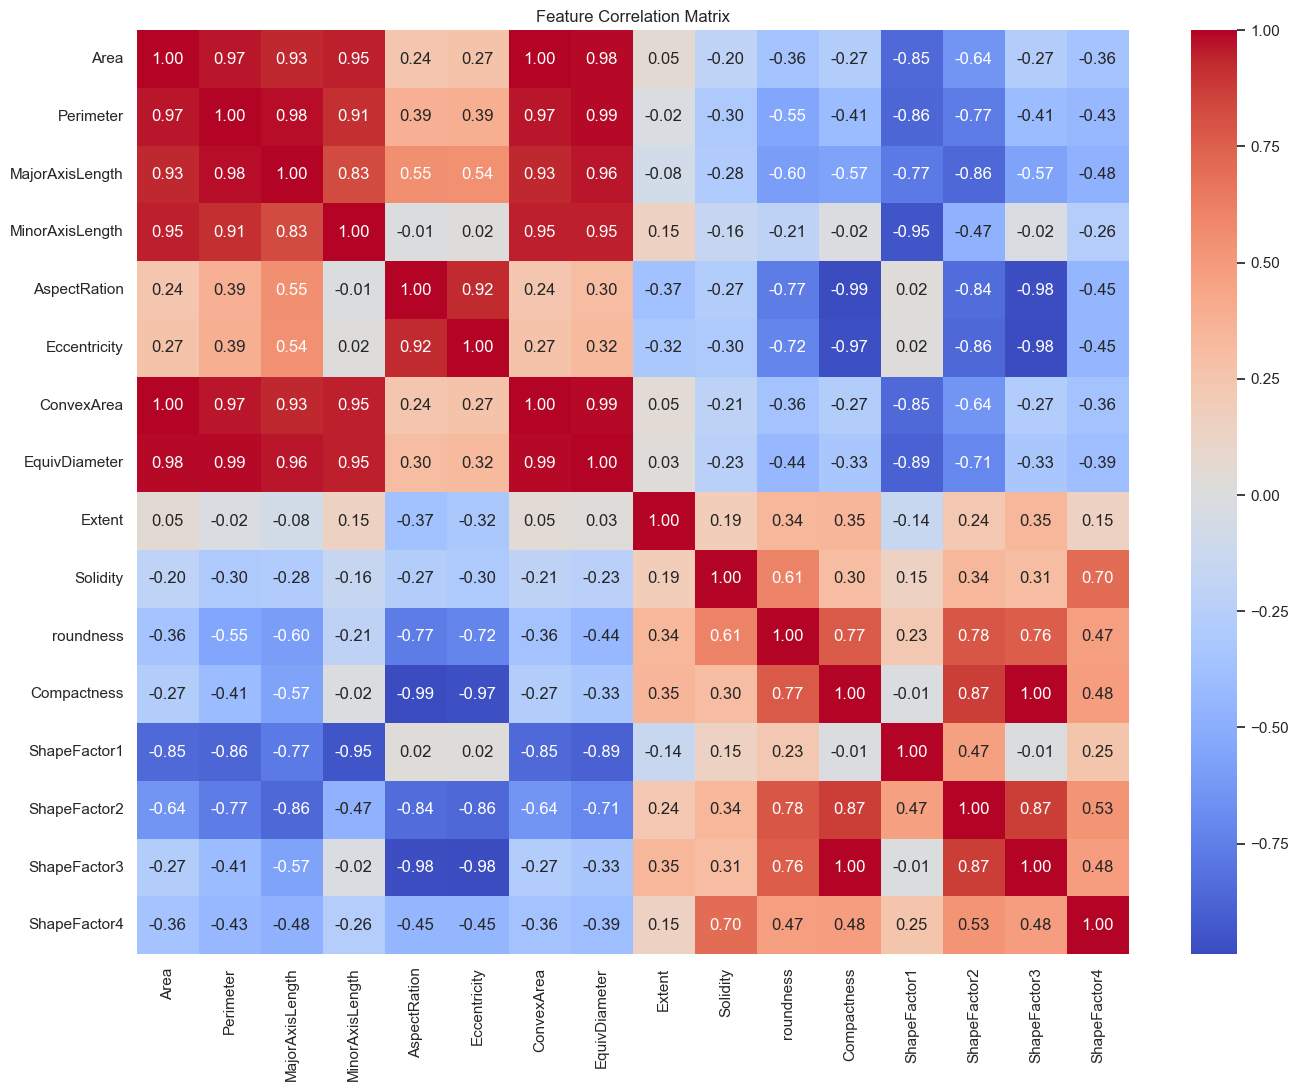

In [9]:
plt.figure(figsize=(16, 12))
corr_matrix = df.drop(['Class','Class_encoded'], axis=1).corr()
print("Correlation matrix:")
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.savefig('feature_correlation.png', dpi=300)
plt.show()

Mutual Information ranking:
Perimeter          1.056907
ConvexArea         1.038620
EquivDiameter      1.037148
Area               1.036810
MajorAxisLength    0.996402
ShapeFactor2       0.954664
ShapeFactor1       0.931071
MinorAxisLength    0.928023
Compactness        0.835602
ShapeFactor3       0.835584
Eccentricity       0.819633
AspectRation       0.819608
roundness          0.799560
ShapeFactor4       0.366569
Solidity           0.234112
Extent             0.198957
dtype: float64

Random Forest Feature Importance ranking:
ShapeFactor3       0.100488
ShapeFactor1       0.090669
Perimeter          0.087576
Compactness        0.084921
MajorAxisLength    0.079159
MinorAxisLength    0.078372
ConvexArea         0.074243
Eccentricity       0.068651
EquivDiameter      0.065027
AspectRation       0.064605
Area               0.056031
roundness          0.052236
ShapeFactor2       0.036999
ShapeFactor4       0.030924
Solidity           0.018594
Extent             0.011506
dtype: float64


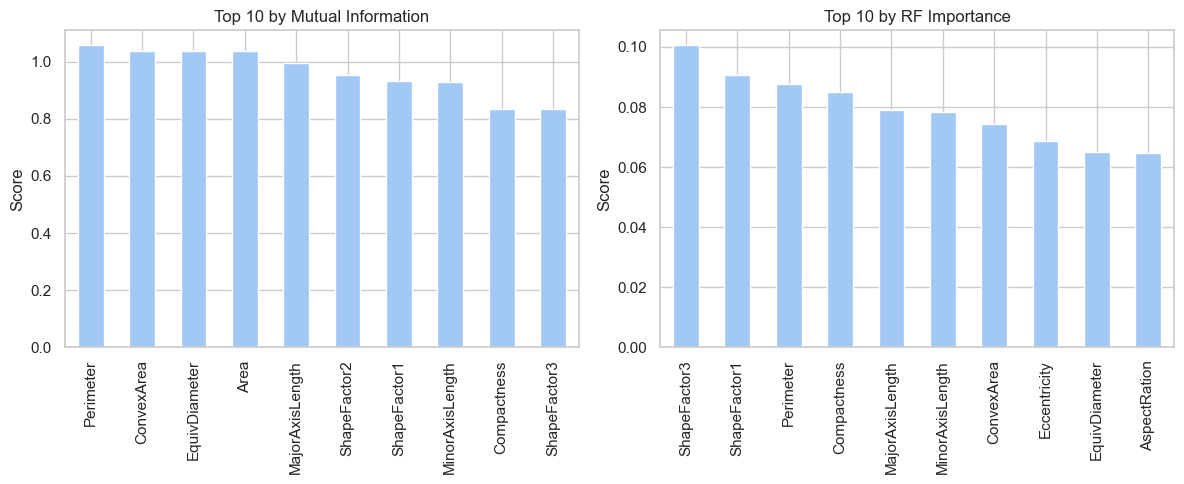


Selected features (top 8 by combined rank):
['Perimeter', 'ConvexArea', 'ShapeFactor1', 'MajorAxisLength', 'ShapeFactor3', 'EquivDiameter', 'Compactness', 'MinorAxisLength']


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt

# 1. 读取数据
df = pd.read_csv('data_processed.csv')
X = df.drop(columns=['Class', 'Class_encoded'])
y = df['Class_encoded']   # 用编码后的类别作为标签

# 2. 计算互信息
mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information ranking:")
print(mi_series)

# 3. 计算随机森林特征重要性
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)
fi_series = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance ranking:")
print(fi_series)

# 4. 可视化前 10 个特征
top_k = 10
fig, axes = plt.subplots(1, 2, figsize=(12,5))
mi_series[:top_k].plot.bar(ax=axes[0], title=f'Top {top_k} by Mutual Information')
fi_series[:top_k].plot.bar(ax=axes[1], title=f'Top {top_k} by RF Importance')
for ax in axes:
    ax.set_ylabel('Score')
plt.tight_layout()
plt.show()

# 5. 合并两种评分，选出最终的前 K 个特征（例如 K=8）
combined_score = (mi_series.rank(ascending=False) + fi_series.rank(ascending=False)) / 2
combined = combined_score.sort_values().index.tolist()
selected_features = combined[:8]
print("\nSelected features (top 8 by combined rank):")
print(selected_features)


c:\Users\lyl61\.conda\envs\jupyter\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\lyl61\.conda\envs\jupyter\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\lyl61\AppData\Local\Temp\ipykernel_7876\2354088056.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(unique_classes))


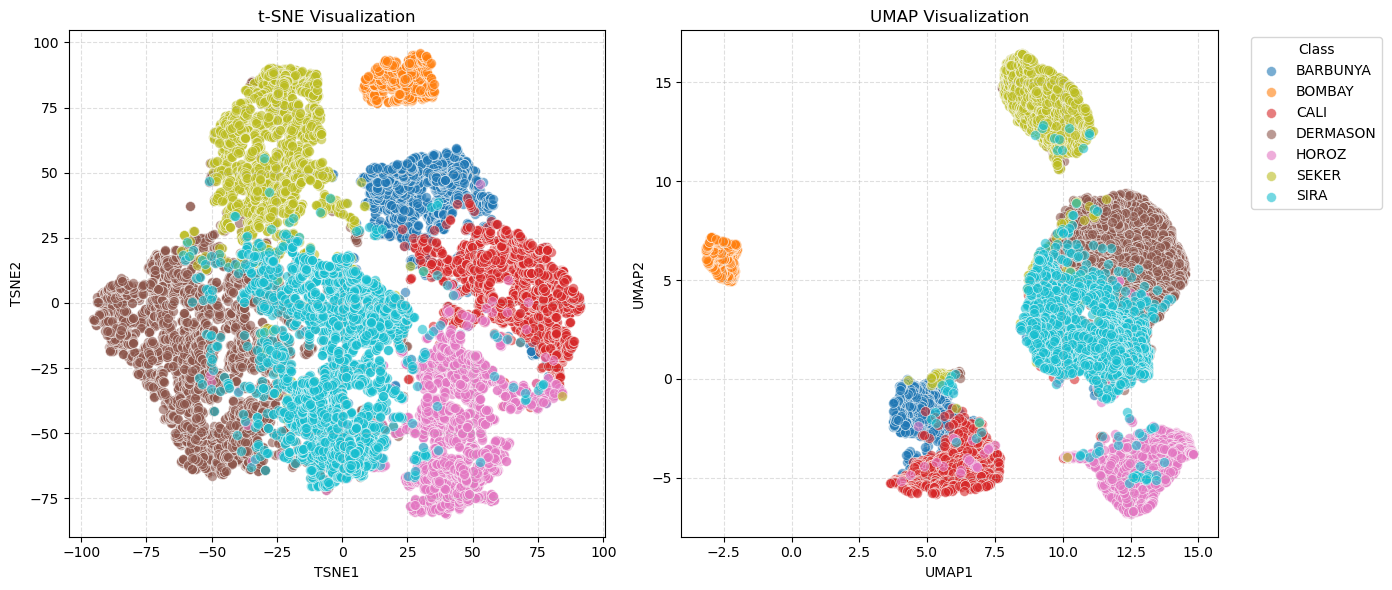

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import umap.umap_ as umap

# 1. loading data and features
df = pd.read_csv('data_processed.csv')
features = [
    'Perimeter', 'ConvexArea', 'ShapeFactor1',
    'MajorAxisLength', 'ShapeFactor3', 'EquivDiameter',
    'Compactness', 'MinorAxisLength', 'ShapeFactor2','Area',
    'Eccentricity', 'AspectRation','Solidity',
    'Extent', 'roundness', 'ShapeFactor4'
]
X = df[features]
y = df['Class']

# 2. dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# 3. 
unique_classes = sorted(y.unique())
colors = cm.get_cmap('tab10', len(unique_classes))
class_to_color = {cls: colors(i) for i, cls in enumerate(unique_classes)}

# 4. 设置画布
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 5. t-SNE 图
for cls in unique_classes:
    idx = y == cls
    axes[0].scatter(
        X_tsne[idx, 0], X_tsne[idx, 1],
        label=cls,
        color=class_to_color[cls],
        alpha=0.6,
        edgecolors='w',
        linewidths=0.5,
        s=50
    )
axes[0].set_title('t-SNE Visualization')
axes[0].set_xlabel('TSNE1')
axes[0].set_ylabel('TSNE2')
axes[0].grid(True, linestyle='--', alpha=0.4)

# 6. UMAP 图
for cls in unique_classes:
    idx = y == cls
    axes[1].scatter(
        X_umap[idx, 0], X_umap[idx, 1],
        label=cls,
        color=class_to_color[cls],
        alpha=0.6,
        edgecolors='w',
        linewidths=0.5,
        s=50
    )
axes[1].set_title('UMAP Visualization')
axes[1].set_xlabel('UMAP1')
axes[1].set_ylabel('UMAP2')
axes[1].grid(True, linestyle='--', alpha=0.4)

# 7. 图例与布局
axes[1].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 8. 保存图片
plt.savefig("dimensionality_comparison.png", dpi=300)
plt.show()


[GaussianMixture] Adjusted Rand Index (ARI): 0.7033
[GaussianMixture] Silhouette Score: 0.4377
[GaussianMixture] Calinski-Harabasz Score: 19505.0549
[GaussianMixture] Davies-Bouldin Score: 0.7806


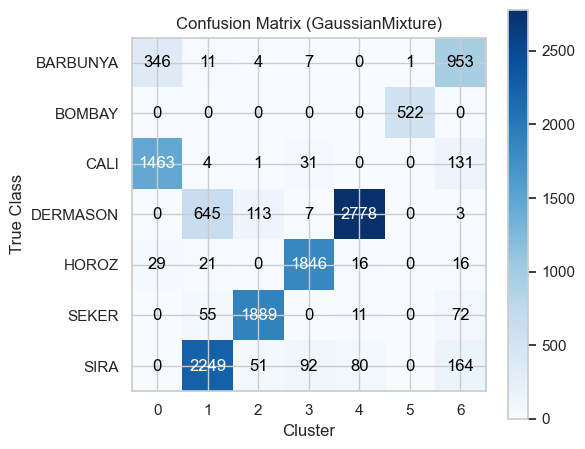

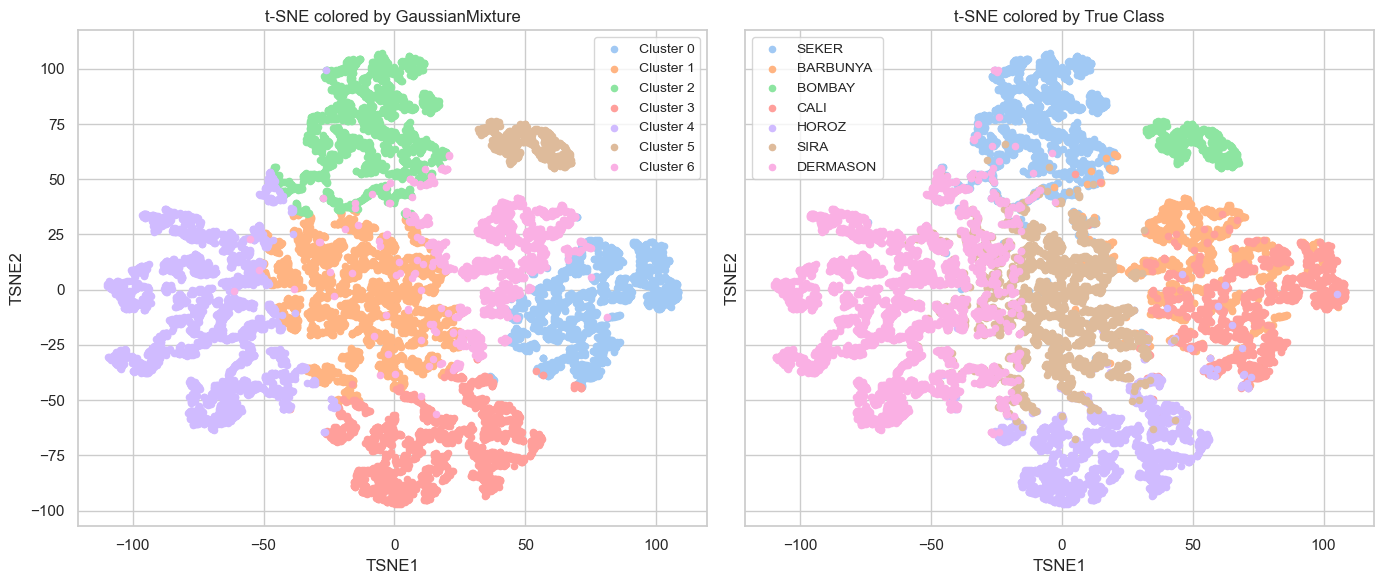

[Ward] Adjusted Rand Index (ARI): 0.7323
[Ward] Silhouette Score: 0.4244
[Ward] Calinski-Harabasz Score: 19129.9518
[Ward] Davies-Bouldin Score: 0.7882


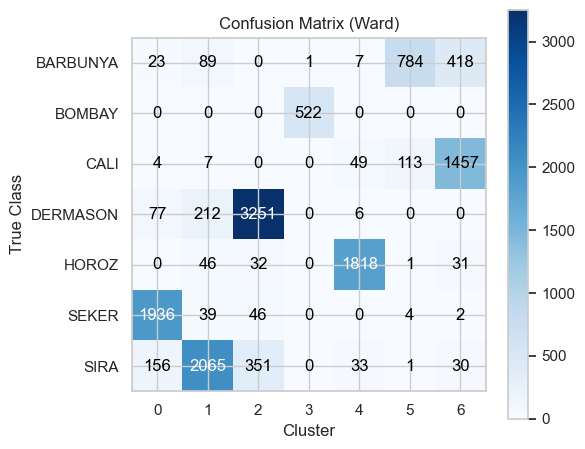

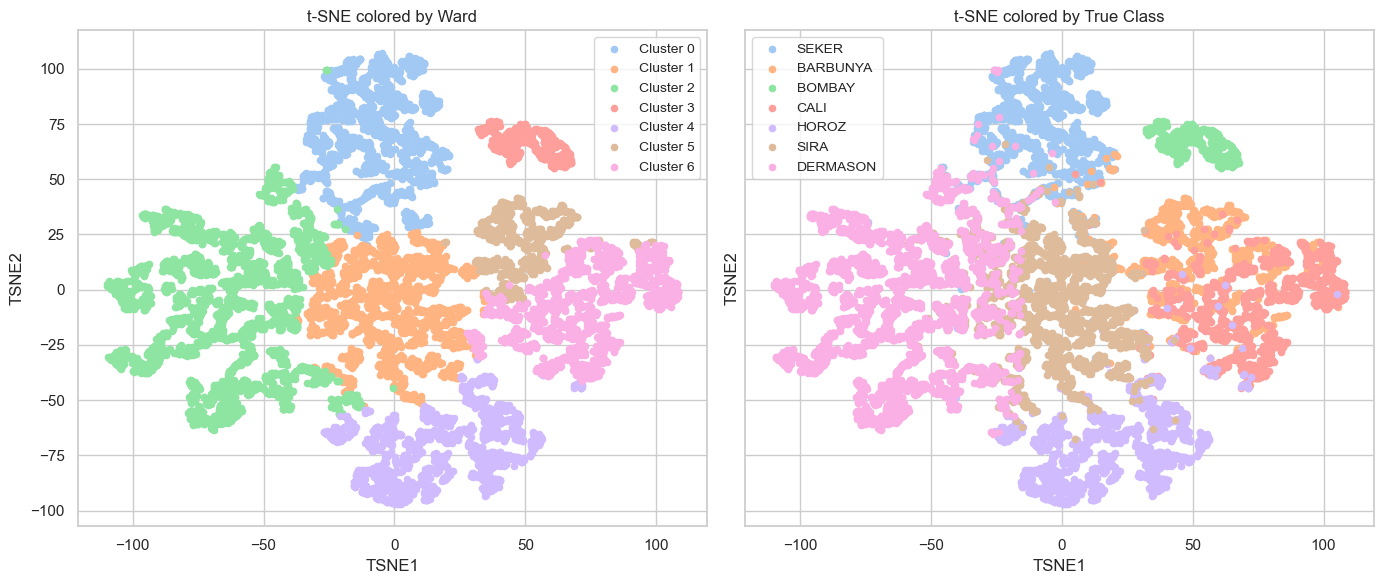

[KMeans] Adjusted Rand Index (ARI): 0.7034
[KMeans] Silhouette Score: 0.4574
[KMeans] Calinski-Harabasz Score: 21054.4948
[KMeans] Davies-Bouldin Score: 0.7472


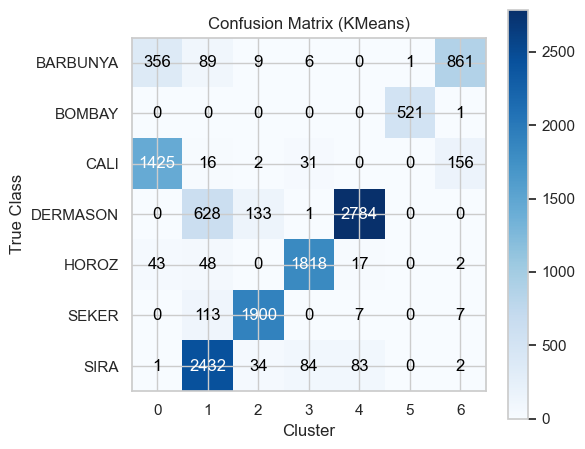

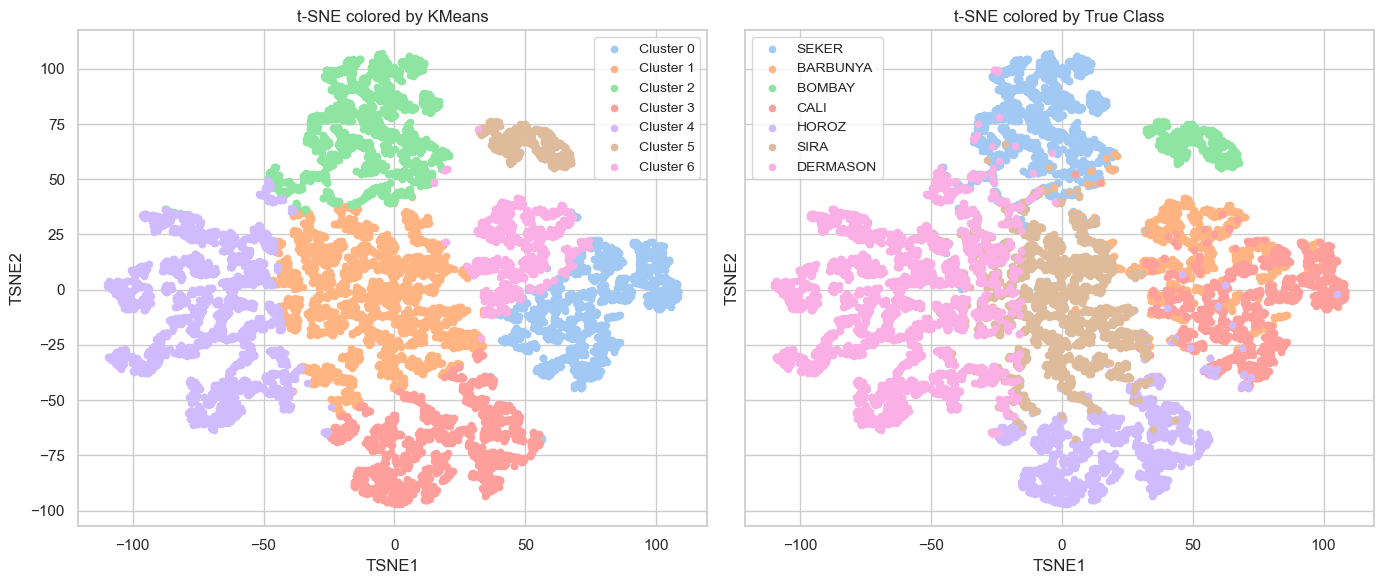

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import adjusted_rand_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
# read the processed data
df = pd.read_csv('data_processed.csv')
features = [
    'Perimeter', 'ConvexArea', 'ShapeFactor1',
    'MajorAxisLength', 'ShapeFactor3', 'EquivDiameter',
    'Compactness', 'MinorAxisLength','ShapeFactor2',
]
X = df[features]
y_true = df['Class']
n_clusters = y_true.nunique()

# compute t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_proj = tsne.fit_transform(X)
df['TSNE1'], df['TSNE2'] = tsne_proj[:, 0], tsne_proj[:, 1]

# define a function to perform clustering and evaluation
def cluster_and_evaluate(method_name):
    if method_name == 'GaussianMixture':
        model = GaussianMixture(n_components=n_clusters, random_state=42, covariance_type='full')
        y_pred = model.fit_predict(X)

    elif method_name == 'KMeans':
        model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
        y_pred = model.fit_predict(X)

    elif method_name == 'Ward':
        Z = linkage(X, method='ward')
        y_pred = fcluster(Z, n_clusters, criterion='maxclust') - 1

    else:
        raise ValueError(f"Unsupported method: {method_name}")

    # compute ARI
    ari = adjusted_rand_score(y_true, y_pred)
    print(f"[{method_name}] Adjusted Rand Index (ARI): {ari:.4f}")
    # compute silhouette score
    silhouette = silhouette_score(X, y_pred)
    print(f"[{method_name}] Silhouette Score: {silhouette:.4f}")
    # compute Calinski-Harabasz score
    ch_score = calinski_harabasz_score(X, y_pred)
    print(f"[{method_name}] Calinski-Harabasz Score: {ch_score:.4f}")
    # compute Davies-Bouldin score
    db_score = davies_bouldin_score(X, y_pred)
    print(f"[{method_name}] Davies-Bouldin Score: {db_score:.4f}")

    # confusion matrix
    cm_df = pd.crosstab(y_true, y_pred, rownames=['True Class'], colnames=['Cluster'])
    plt.figure(figsize=(6, 5))
    plt.imshow(cm_df.values, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({method_name})')
    plt.xlabel('Cluster')
    plt.ylabel('True Class')
    plt.xticks(np.arange(cm_df.shape[1]), cm_df.columns)
    plt.yticks(np.arange(cm_df.shape[0]), cm_df.index)
    thresh = cm_df.values.max() / 2
    for i, j in np.ndindex(cm_df.shape):
        plt.text(j, i, cm_df.iat[i, j],
                 ha='center', va='center',
                 color='white' if cm_df.iat[i, j] > thresh else 'black')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

    # t-SNE visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

    # left plot: clustering result
    ax = axes[0]
    for cl in sorted(set(y_pred)):
        sub = df[np.array(y_pred) == cl]
        ax.scatter(sub['TSNE1'], sub['TSNE2'], label=f'Cluster {cl}', s=20)
    ax.set_title(f't-SNE colored by {method_name}')
    ax.set_xlabel('TSNE1')
    ax.set_ylabel('TSNE2')
    ax.legend(fontsize='small')

    # right plot: true class
    ax = axes[1]
    for cls in df['Class'].unique():
        sub = df[df['Class'] == cls]
        ax.scatter(sub['TSNE1'], sub['TSNE2'], label=cls, s=20)
    ax.set_title('t-SNE colored by True Class')
    ax.set_xlabel('TSNE1')
    ax.set_ylabel('TSNE2')
    ax.legend(fontsize='small')

    plt.tight_layout()
    plt.show()


# perform clustering and evaluation for each method
for method in ['GaussianMixture', 'Ward', 'KMeans']:
    cluster_and_evaluate(method)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

# 1. loading data
df = pd.read_csv('data_processed.csv')
features = [
    'Perimeter', 'ConvexArea', 'ShapeFactor1',
    'MajorAxisLength', 'ShapeFactor3', 'EquivDiameter',
    'Compactness', 'MinorAxisLength'
]
X = df[features]

# 2. define the range of components and covariance types
component_range = range(2, 11)  # 从 2 到 10 个组件
cov_types = ['full', 'tied', 'diag', 'spherical']

# 3. compute BIC and AIC for each combination
results = []
for cov in cov_types:
    for n in component_range:
        gmm = GaussianMixture(n_components=n, covariance_type=cov, random_state=42)
        gmm.fit(X)
        results.append({
            'covariance_type': cov,
            'n_components': n,
            'BIC': gmm.bic(X),
            'AIC': gmm.aic(X)
        })

# 4. construct a DataFrame to store results
results_df = pd.DataFrame(results)

# 5. finding the best model
best_bic = results_df.loc[results_df['BIC'].idxmin()]
best_aic = results_df.loc[results_df['AIC'].idxmin()]

print("===== Best BIC configuration =====")
print(best_bic.to_frame().T)   # 转置以便横向显示


===== Best BIC configuration =====
  covariance_type n_components            BIC            AIC
8            full           10 -463907.411651 -467283.278123

===== Best AIC configuration =====
  covariance_type n_components            BIC            AIC
8            full           10 -463907.411651 -467283.278123

===== Full BIC/AIC Table =====
   covariance_type  n_components            BIC            AIC
0             full             2 -297065.886057 -297735.044445
1             full             3 -337716.144119 -338723.641017
2             full             4 -370691.132098 -372036.967506
3             full             5 -395882.800577 -397566.974496
4             full             6 -423003.835213 -425026.347642
5             full             7 -436859.290352 -439220.141293
6             full             8 -449512.138267 -452211.327718
7             full             9 -457308.250814 -460345.778775
8             full            10 -463907.411651 -467283.278123
9             tied     

In [11]:
import pandas as pd
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# 1. Load data and features
df = pd.read_csv('data_processed.csv')
features = [
    'Perimeter', 'ConvexArea', 'ShapeFactor1',
    'MajorAxisLength', 'ShapeFactor3', 'EquivDiameter',
    'Compactness', 'MinorAxisLength', 'ShapeFactor2','Area',
    'Eccentricity', 'AspectRation','Solidity',
    'Extent', 'roundness', 'ShapeFactor4'
]
X = df[features]
y_true = df['Class_encoded']  # assume encoded 0–6

# 2. Generate embeddings
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)
X_umap = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(X)

# 3. Define clustering algorithms
clusterers = {
    't-SNE + DBSCAN':   (DBSCAN(eps=5, min_samples=5), X_tsne),
    't-SNE + GMM':      (GaussianMixture(n_components=7, covariance_type='full', random_state=42), X_tsne),
    'UMAP + DBSCAN':    (DBSCAN(eps=5, min_samples=5), X_umap),
    'UMAP + GMM':       (GaussianMixture(n_components=7, covariance_type='full', random_state=42), X_umap),
}

# 4. Fit, predict, and evaluate
for name, (model, embedding) in clusterers.items():
    if hasattr(model, 'fit_predict'):
        labels = model.fit_predict(embedding)
    else:
        model.fit(embedding)
        labels = model.predict(embedding)
    ari = adjusted_rand_score(y_true, labels)
    print(f"{name:15s} ARI = {ari:.3f}")


c:\Users\lyl61\.conda\envs\jupyter\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\lyl61\.conda\envs\jupyter\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


t-SNE + DBSCAN  ARI = 0.033
t-SNE + GMM     ARI = 0.552
UMAP + DBSCAN   ARI = 0.033
UMAP + GMM      ARI = 0.639
